In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

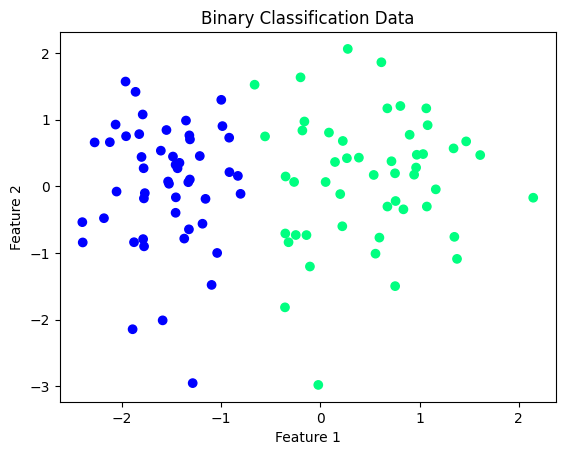

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Data')
plt.show()


In [4]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [5]:
def step(z):
    return 1 if z>0 else 0

def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1 #Learning Rate
    ephocs = 1000

    for i in range(ephocs):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)

[1.3322245  0.20016248]
0.9


In [8]:
m = -(coef_[0]/coef_[1])
c = -(intercept_/coef_[1])

In [9]:
m

np.float64(-6.655715418085721)

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

(-3.0, 2.0)

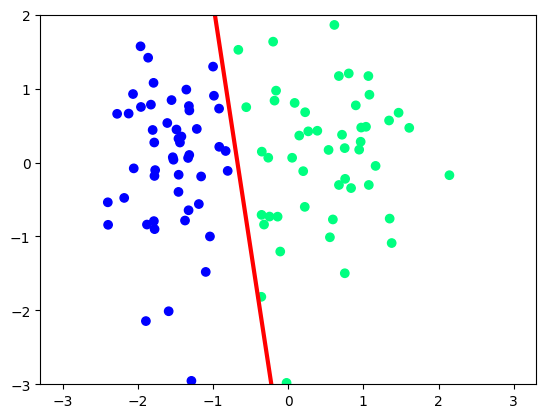

In [11]:
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)

## NOW USING SKLEARN NATIVE

In [12]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [13]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
c = -(lor.intercept_[0]/lor.coef_[0][1])


# w0, w1 = lor.coef_[0]
# b = lor.intercept_[0]

# m = -w0 / w1
# c = -b / w1

In [17]:
c

np.float64(-81.16386950826424)

In [14]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + c

(-3.0, 2.0)

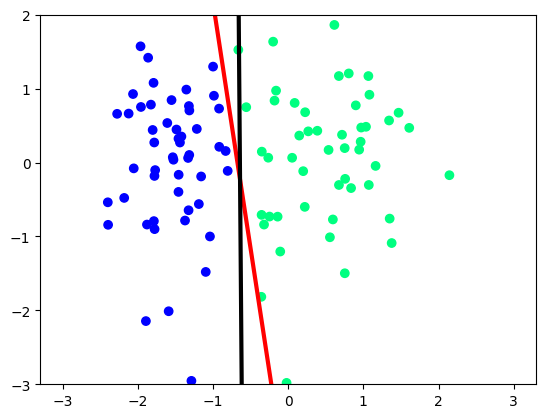

In [15]:
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3) # Comparison for SKLEARN MODEL VS PERCEPTRON TRICK
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)
    